# 1. Regularization Linear regression

## 1.1 data--visualization

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
path = "ex5data1.mat"
data = sio.loadmat(path)
X,y,Xval,yval,Xtest,ytest = map(np.ravel,
                               [data['X'], data['y'],
                               data['Xval'],data['yval'],
                               data['Xtest'],data['ytest']])
X.shape, y.shape, Xval.shape, yval.shape, Xtest.shape,ytest.shape

((12,), (12,), (21,), (21,), (21,), (21,))

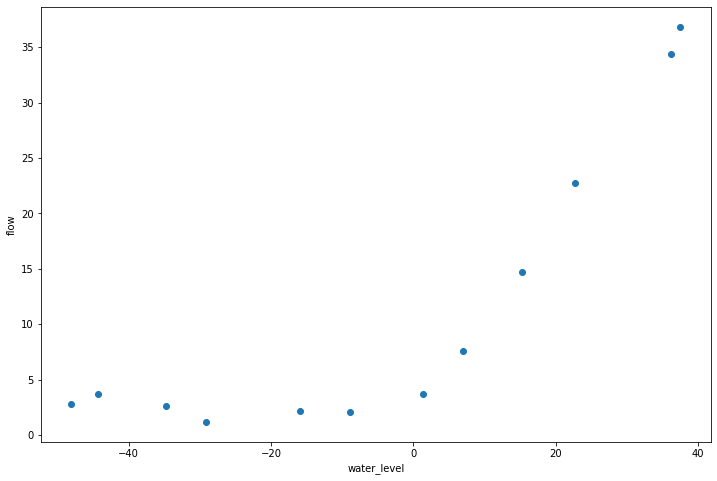

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X,y)
ax.set_xlabel("water_level")
ax.set_ylabel('flow')
plt.show()


In [4]:
X,Xval,Xtest = [np.insert(x.reshape(x.shape[0],1),0, np.ones(x.shape[0]),axis=1) for x in (X,Xval,Xtest)] 


In [5]:
def cost(theta, X, y):
    """
    X: R(m*n), m records, n features
    y: R(m)
    theta : R(n), linear regression parameters
    """
    m = X.shape[0]

    inner = X @ theta - y  # R(m*1)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [6]:
def costReg(theta,X,y,reg=1):
    m = X.shape[0]
    regularized_term = (reg/(2*m)) * np.power(theta[1:], 2).sum()
    
    return cost(theta, X, y) + regularized_term

In [7]:
theta = np.ones(X.shape[1])
costReg(theta,X,y,1)


303.9931922202643

In [8]:
def gradient(theta,X,y):
    m = X.shape[0]
    
    inner = X.T@(X@theta-y) 
    return inner/ m


In [9]:
def gradientReg(theta,X,y,reg):
    m = X.shape[0]
    regularized_term = theta.copy() # same shape as theta
    regularized_term[0] = 0
    
    regularized_term = (reg / m) * regularized_term

    return gradient(theta, X, y) + regularized_term

In [10]:
gradientReg(theta,X,y,1)


array([-15.30301567, 598.25074417])

# 1.4 拟合线性回归
调用工具库找到最优解，在这个部分，我们令。因为我们现在训练的是2维的，所以正则化不会对这种低维的有很大的帮助。
完成之后，将数据和拟合曲线可视化。

In [11]:
theta = np.ones(X.shape[1])
final_theta = opt.minimize(fun=costReg, x0=theta, args=(X, y, 0), method='TNC', jac=gradientReg, options={'disp': True}).x
final_theta

array([13.08790348,  0.36777923])

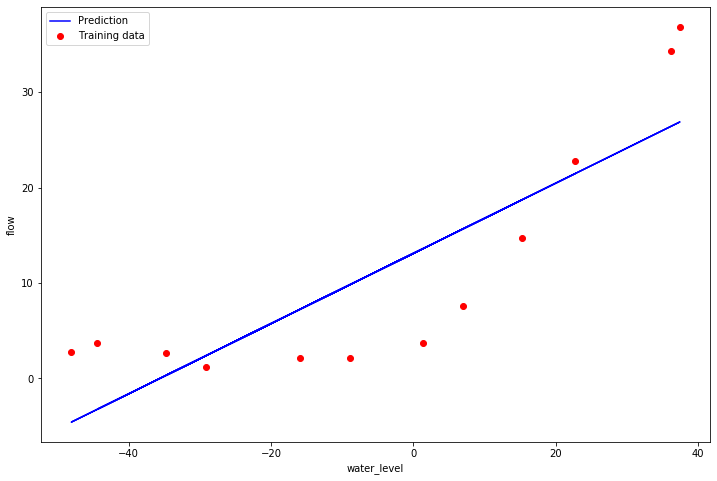

In [12]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[:,1], y, c='r', label="Training data")
plt.plot(X[:, 1], X[:, 1]*m + b, c='b', label="Prediction")
ax.set_xlabel('water_level')
ax.set_ylabel('flow')
ax.legend()
plt.show()


# bias and variance
偏差较大的模型会欠拟合，方差较大的模型会过拟合

In [13]:
def linear_regression(X,y,l=1):
    """linear regression
    args:
        X： feature matrix,(m,n+1) with incercept x0 = 1
        y: target vector (m,)
        
        l: lambda constant for regularization
    """
    # init theta
    theta = np.ones(X.shape[1])
    
    # train it
    res = opt.minimize(fun=costReg,
                      x0 = theta,
                      args= (X,y,l),
                      jac = gradientReg,
                      options={'disp':True}
                      )
    return res

In [14]:
training_cost, cv_cost = [], []


In [15]:
m = X.shape[0]
for i in range(1,m+1):
    res = linear_regression(X[:i,:],y[:i],0)
    
    tc = costReg(res.x,X[:i,:],y[:i],0)
    cv = costReg(res.x,Xval,yval,0)
    
    training_cost.append(tc)
    cv_cost.append(cv)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 5
         Function evaluations: 6
         Gradi

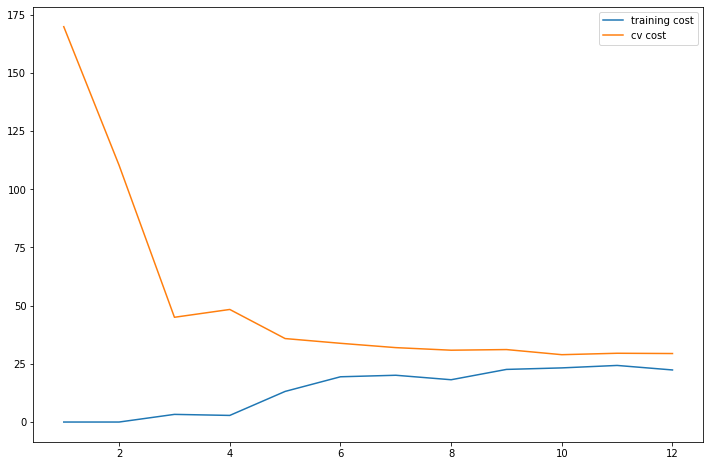

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv cost')
plt.legend()
plt.show()


# 多项式回归

In [17]:
def poly_features(x, power, as_ndarray=False):
    data = {'f{}'.format(i): np.power(x, i) for i in range(1,power+1)}
    df = pd.DataFrame(data)
    return df.values if as_ndarray else df


In [18]:
data = sio.loadmat(path)
X, y, Xval, yval, Xtest, ytest = map(np.ravel,[data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']])


In [19]:
poly_features(X,power=3)


,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


In [21]:
def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [24]:
def prepare_poly_data(*args,power):
    """
    args: keep feeding in X, Xval, or Xtest
        will return in the same order
    """
    def prepare(x):
        df = poly_features(x, power=power)
        
        ndarr = normalize_feature(df).values
        
        return np.insert(ndarr,0,np.ones(ndarr.shape[0]),axis=1)
        
    return [prepare(x) for x in args]
        
        

In [25]:
X_poly, Xval_poly, Xtest_poly= prepare_poly_data(X, Xval, Xtest, power=8)
X_poly[:3, :]


array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

## 画出拟合曲线

In [26]:
def plot_learning_curve(X, Xinit, y, Xval, yval, l=0):
    training_cost, cv_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        # regularization applies here for fitting parameters
        res = linear_regression(X[:i, :], y[:i], l=l)

        # remember, when you compute the cost here, you are computing
        # non-regularized cost. Regularization is used to fit parameters only
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    fig, ax = plt.subplots(2,  1, figsize=(12, 12))
    ax[0].plot(np.arange(1, m + 1), training_cost, label='training cost')
    ax[0].plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    ax[0].legend()

    fitx = np.linspace(-50, 50, 100) 
    fitxtmp = prepare_poly_data(fitx, power=8)
    fity = np.dot(prepare_poly_data(fitx, power=8)[0], linear_regression(X, y, l).x.T)
    
    ax[1].plot(fitx, fity, c='r', label='fitcurve')
    ax[1].scatter(Xinit, y, c='b', label='initial_Xy')
    
    ax[1].set_xlabel('water_level')
    ax[1].set_ylabel('flow')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 37
         Gr

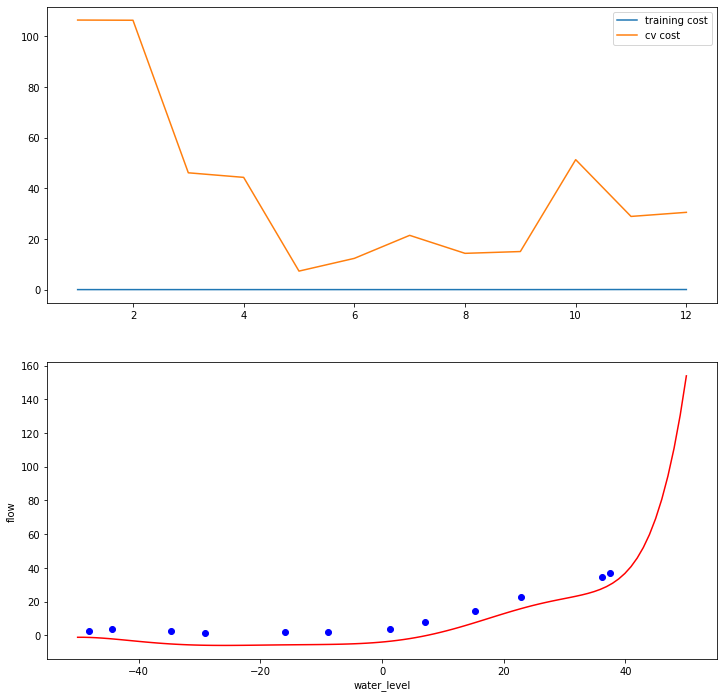

In [27]:
plot_learning_curve(X_poly, X, y, Xval_poly, yval, l=0)
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.072694
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 18.498793
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 14.575864
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 11.660715
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 10.118820
         Iterations: 17
         Function evaluations: 18
 

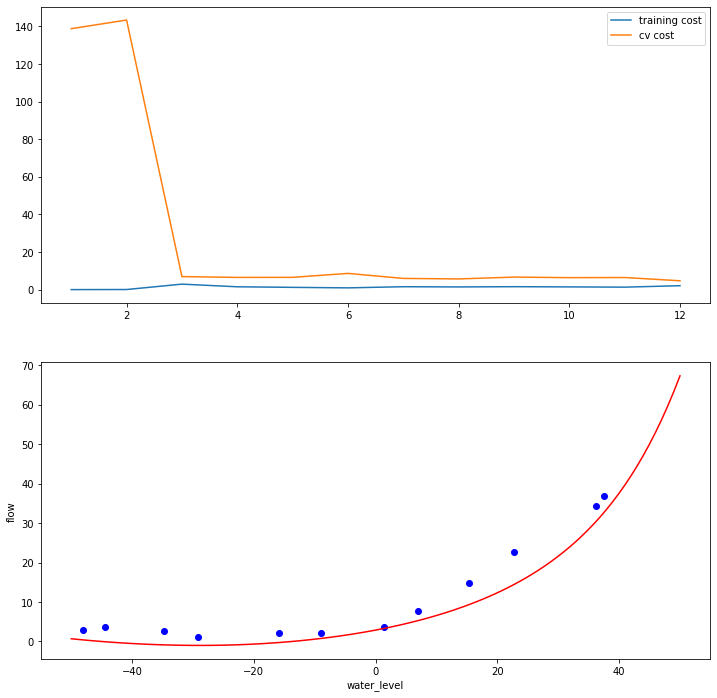

In [28]:
# lamda = 1
plot_learning_curve(X_poly, X, y, Xval_poly, yval, l=1)
plt.show()


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.114778
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 112.782289
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 132.620323
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 117.349131
         Iterations: 14
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 109.921330
         Iterations: 13
         Function evaluations: 18

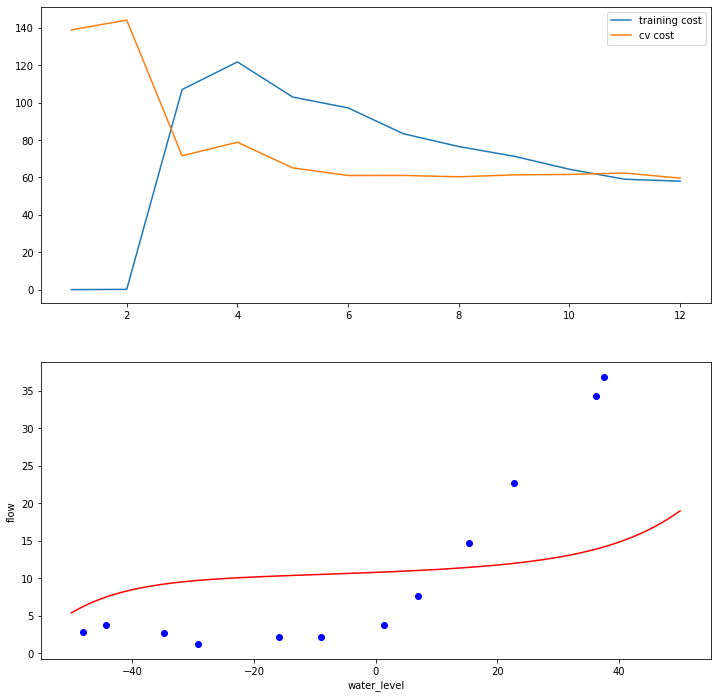

In [29]:
# lamda=100
plot_learning_curve(X_poly, X, y, Xval_poly, yval, l=100)
plt.show()

# 找到最佳的λ

In [30]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []


In [31]:
for l in l_candidate:
    res = linear_regression(X_poly, y, l)
    
    tc = cost(res.x, X_poly, y)
    cv = cost(res.x, Xval_poly, yval)
    
    training_cost.append(tc)
    cv_cost.append(cv)
    

Optimization terminated successfully.
         Current function value: 0.028893
         Iterations: 74
         Function evaluations: 77
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 0.174792
         Iterations: 70
         Function evaluations: 72
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 0.249933
         Iterations: 64
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.385063
         Iterations: 48
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 0.669275
         Iterations: 44
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 1.443470
         Iterations: 38
         Function evaluations: 40
  

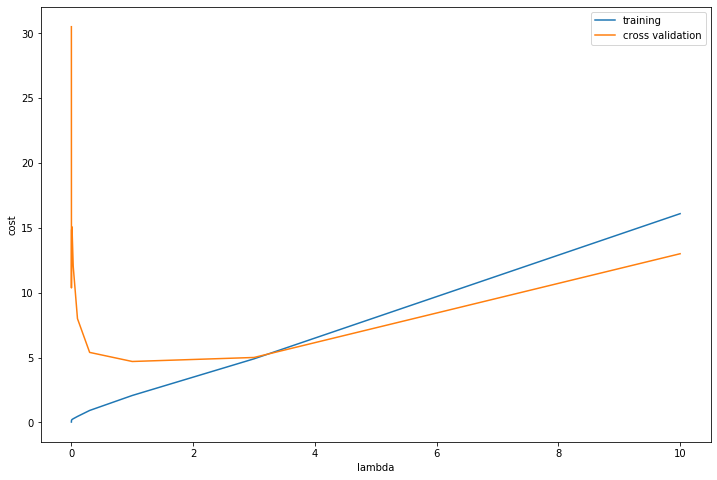

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(l_candidate, training_cost, label='training')
ax.plot(l_candidate, cv_cost, label='cross validation')
plt.legend()

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()


## 计算测试数据集上的误差

In [33]:
# use test data to compute the cost
for l in l_candidate:
    theta = linear_regression(X_poly, y, l).x
    print('test cost(l={}) = {}'.format(l, cost(theta, Xtest_poly, ytest)))

Optimization terminated successfully.
         Current function value: 0.028893
         Iterations: 74
         Function evaluations: 77
         Gradient evaluations: 77
test cost(l=0) = 10.191332483783599
Optimization terminated successfully.
         Current function value: 0.174792
         Iterations: 70
         Function evaluations: 72
         Gradient evaluations: 72
test cost(l=0.001) = 11.033706027813363
Optimization terminated successfully.
         Current function value: 0.249933
         Iterations: 64
         Function evaluations: 67
         Gradient evaluations: 67
test cost(l=0.003) = 11.264623881870381
Optimization terminated successfully.
         Current function value: 0.385063
         Iterations: 48
         Function evaluations: 50
         Gradient evaluations: 50
test cost(l=0.01) = 10.880196381336068
Optimization terminated successfully.
         Current function value: 0.669275
         Iterations: 44
         Function evaluations: 46
         Gradient e

### 调参后，λ = 0.3 ， 是最优选择，这个时候测试的代价最小